In [ ]:
!pip install --upgrade vnstock

In [ ]:
from vnstock import *
from datetime import datetime

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

In [ ]:
listing_companies(live=True)

,ticker,organName,organTypeCode,comGroupCode
0,A32,CTCP 32,1,UPCOM
1,AAA,CTCP Nhựa An Phát Xanh,1,HOSE
2,AAH,CTCP Hợp Nhất,1,UPCOM
3,AAM,CTCP Thủy sản MeKong,1,HOSE
4,AAS,CTCP Chứng khoán SmartInvest,4,UPCOM
...,...,...,...,...
1746,YBC,CTCP Xi măng và Khoáng sản Yên Bái,1,UPCOM
1747,YBM,CTCP Khoáng sản Công nghiệp Yên Bái,1,HOSE
1748,YEG,CTCP Tập đoàn Yeah1,1,HOSE
1749,YSVN,Công ty TNHH Chứng khoán Yuanta Việt Nam,4,OTC


Some of stock code of bank in Vietnam:
- VCB: Vietcombank
- TCB: Techcombank
- ACB: NH A Chau
- MBB: MB Bank
- VPB: VP Bank
- VIB: NH VIB

In [ ]:
list_of_bank = ['VIB', 'VCB', 'MBB', 'TCB']
company_overview(list_of_bank[3])


,ticker,exchange,industry,companyType,noShareholders,foreignPercent,outstandingShare,issueShare,establishedYear,noEmployees,stockRating,deltaInWeek,deltaInMonth,deltaInYear,shortName,industryEn,industryID,industryIDv2,website
0,TCB,HOSE,Ngân hàng,NH,1901,0.225,3522.5,3522.5,1993,11742,3.1,-0.027,0.085,0.368,Techcombank,Banks,289,8355,https://techcombank.com


In [ ]:
company_profile(list_of_bank[3])

,id,companyName,ticker,companyProfile,historyDev,companyPromise,businessRisk,keyDevelopments,businessStrategies
0,None,Ngân hàng Thương mại Cổ phần Kỹ thương Việt Nam,TCB,Ngân hàng Thương mại Cổ phần Kỹ thương Việt Na...,Ngày 27/09/1993: Ngân hàng Thương mại Cổ phầ...,Chuyển đổi số trong lĩnh vực tài chính - ngân...,Nguy cơ rủi ro lạm phát do nhiều yếu tố khác...,Huy động vốn; Tín dụng; Liên kết và đầu tư t...,Mở rộng tập khách hàng cả về quy mô và tốc độ...


In [ ]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day).strftime('%Y-%m-%d')
end = end.strftime('%Y-%m-%d')
start


'2023-04-06'

In [ ]:
for bank in list_of_bank:
    get_stock_of_bank = stock_historical_data(symbol = bank,
                            start_date = start,
                            end_date = end,
                            resolution='1D',
                            type='stock',
                            beautify=False,
                            decor=True,
                            source='DNSE')
    globals()[bank] = pd.DataFrame(get_stock_of_bank)

company_list = [VIB, VCB, MBB, TCB]
company_name = ['VIB', 'VCB', 'MBB', 'TCB']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)


,Open,High,Low,Close,Volume,Ticker,company_name
Time,,,,,,,
2024-03-25,45.60,46.40,44.15,44.80,10737400,TCB,TCB
2024-03-26,44.80,46.20,44.50,45.95,7755900,TCB,TCB
2024-03-27,46.20,46.20,45.10,45.55,4640100,TCB,TCB
2024-03-28,48.70,48.70,47.70,48.00,30022800,TCB,TCB
2024-03-29,47.95,48.15,47.55,47.55,6403800,TCB,TCB
2024-04-01,47.55,47.70,46.85,47.45,8561000,TCB,TCB
2024-04-02,47.60,48.00,47.00,47.65,13559100,TCB,TCB
2024-04-03,47.40,47.95,46.80,46.80,8776700,TCB,TCB
2024-04-04,46.50,46.75,45.95,46.00,10756900,TCB,TCB


In [ ]:
TCB["Close"]

Time
2023-04-06    29.95
2023-04-07    29.55
2023-04-10    30.15
2023-04-11    30.40
2023-04-12    30.60
              ...  
2024-04-01    47.45
2024-04-02    47.65
2024-04-03    46.80
2024-04-04    46.00
2024-04-05    45.20
Name: Close, Length: 251, dtype: float64

In [ ]:
print(df.shape)
print(type(df))

(1004, 7)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
VIB.describe()

,Open,High,Low,Close,Volume
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,19.446335,19.632151,19.224701,19.423625,5.133280e+06
std,1.844029,1.876862,1.794303,1.849379,3.313249e+06
min,16.320000,16.400000,16.150000,16.280000,1.306800e+06
25%,18.270000,18.420000,18.080000,18.245000,3.059500e+06
50%,19.150000,19.340000,19.000000,19.100000,4.287500e+06
75%,20.410000,20.650000,20.220000,20.410000,6.116550e+06
max,24.500000,25.000000,24.000000,24.600000,2.715280e+07


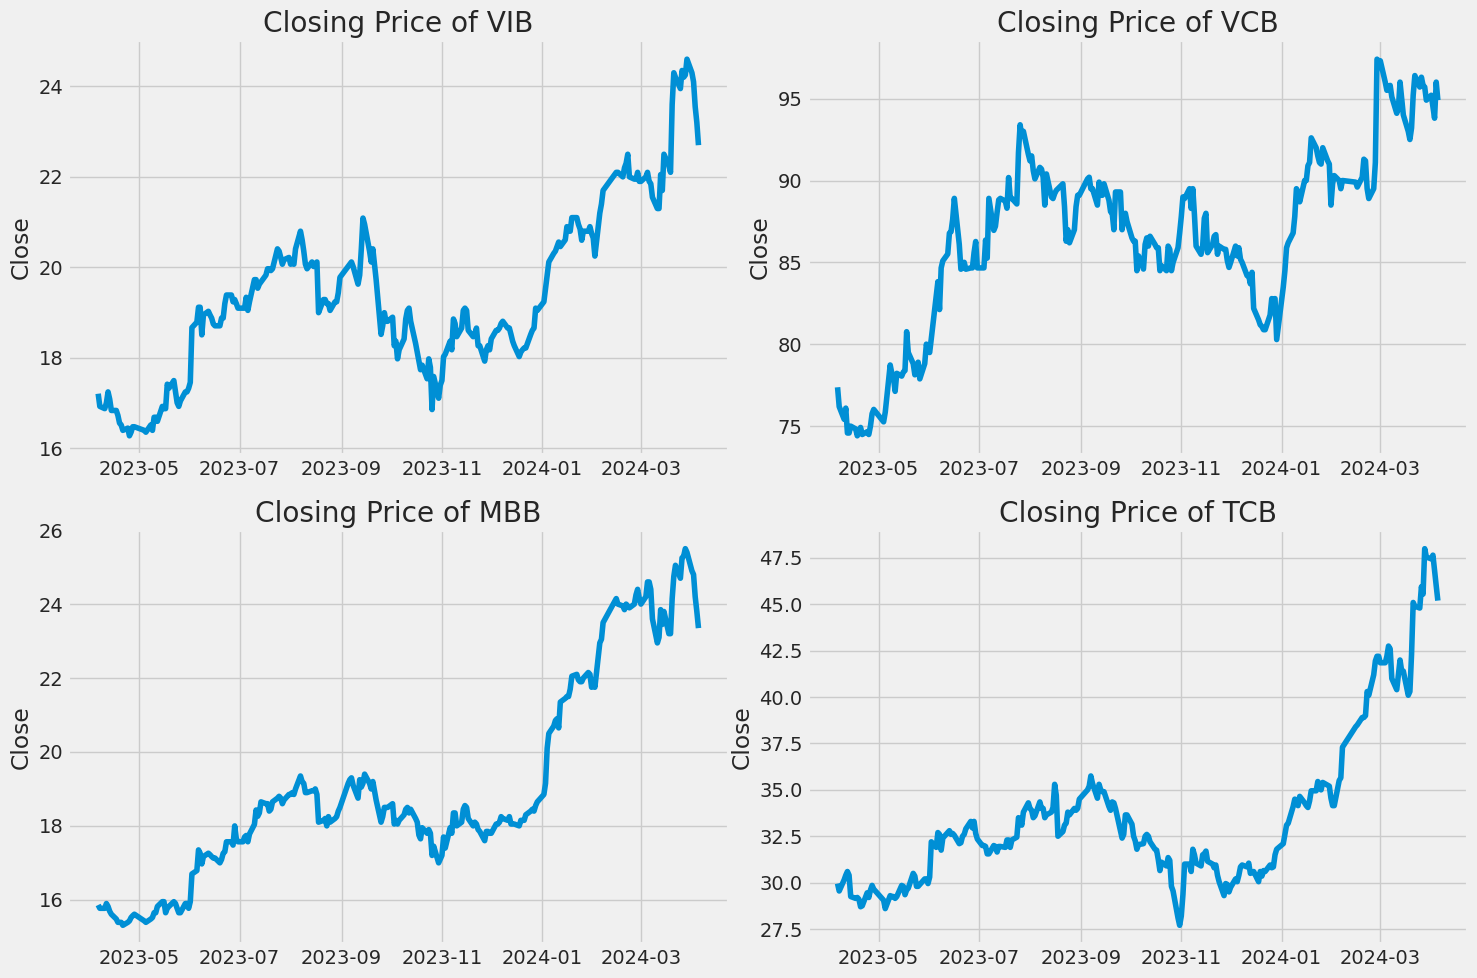

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {list_of_bank[i - 1]}")

plt.tight_layout()

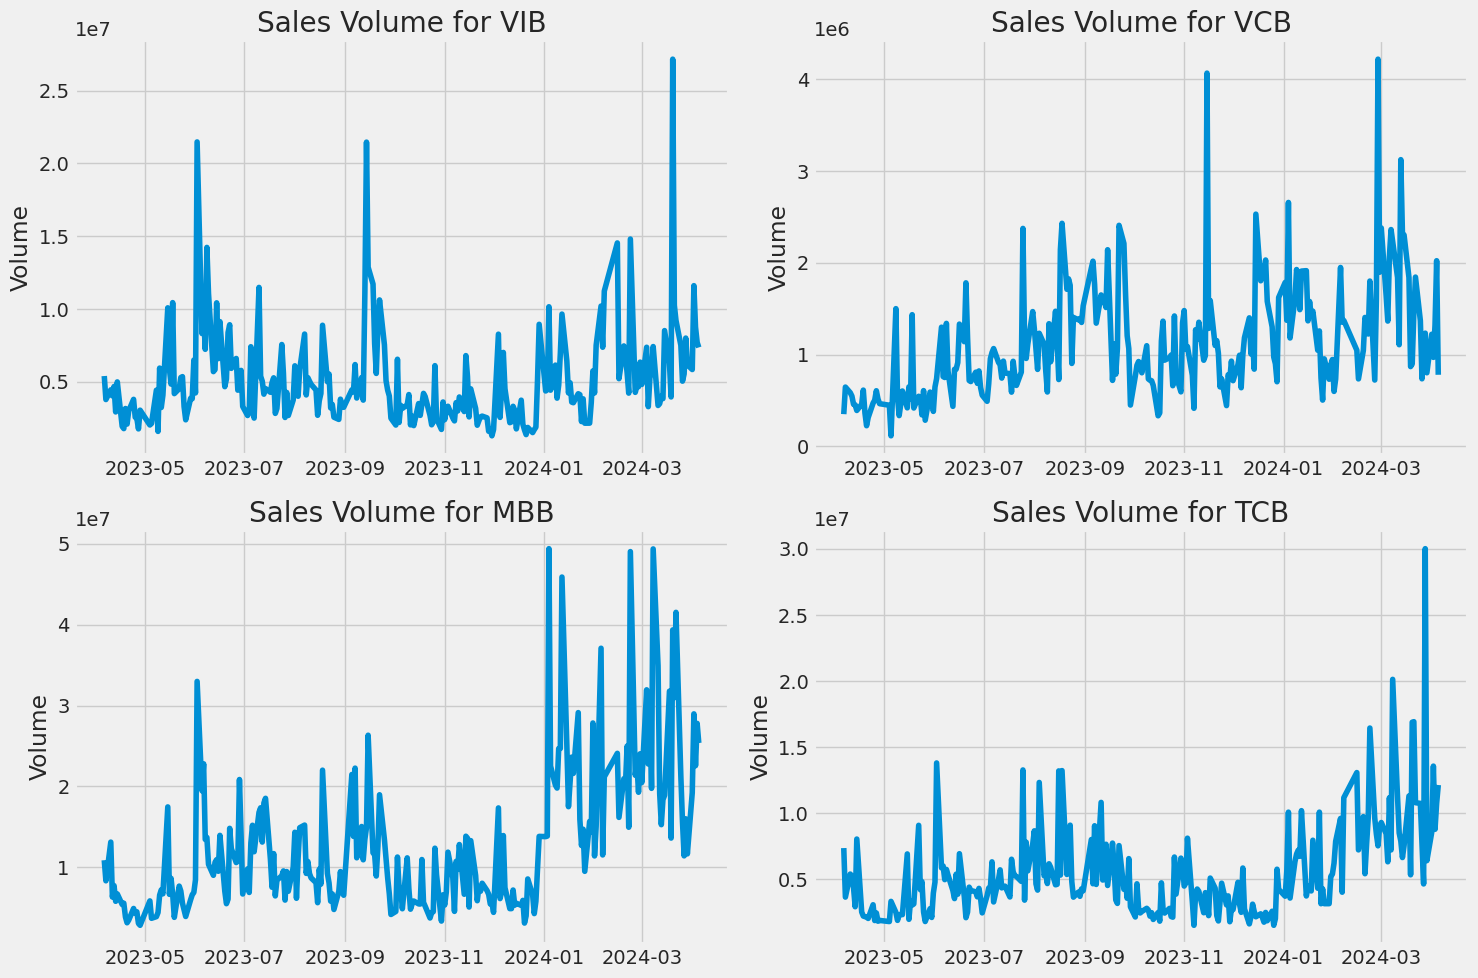

In [ ]:
# Bieu do tong volumn duoc giao dich moi ngay
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {list_of_bank[i - 1]}")

plt.tight_layout()

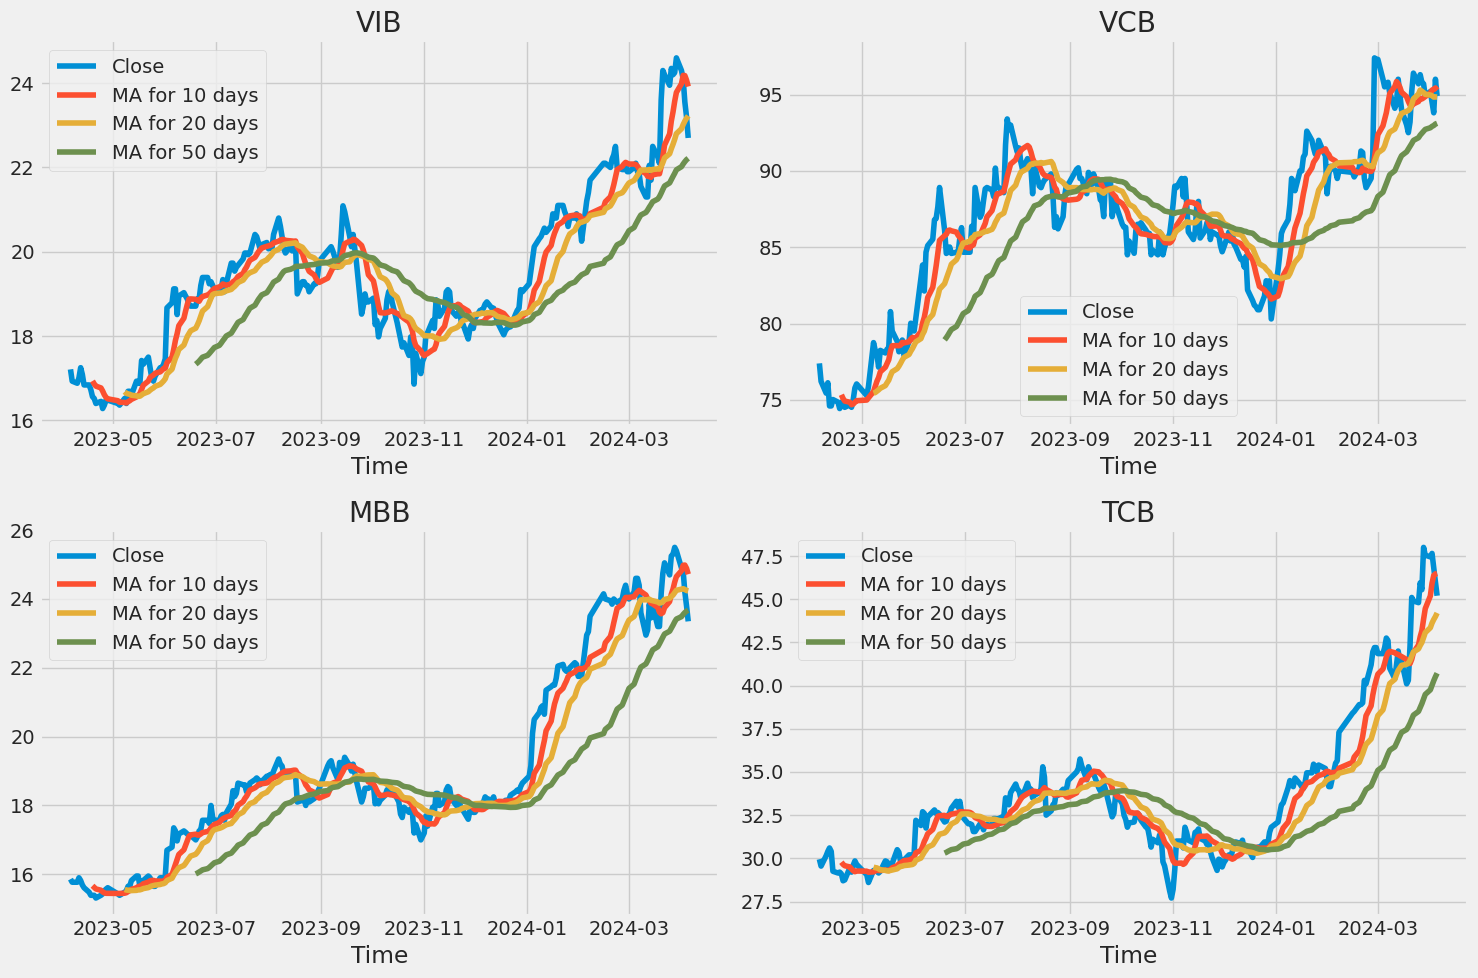

In [ ]:
# list_of_bank = ['VIB', 'VCB', 'MBB', 'TCB']
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VIB[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('VIB')

VCB[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('VCB')

MBB[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MBB')

TCB[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('TCB')

fig.tight_layout()

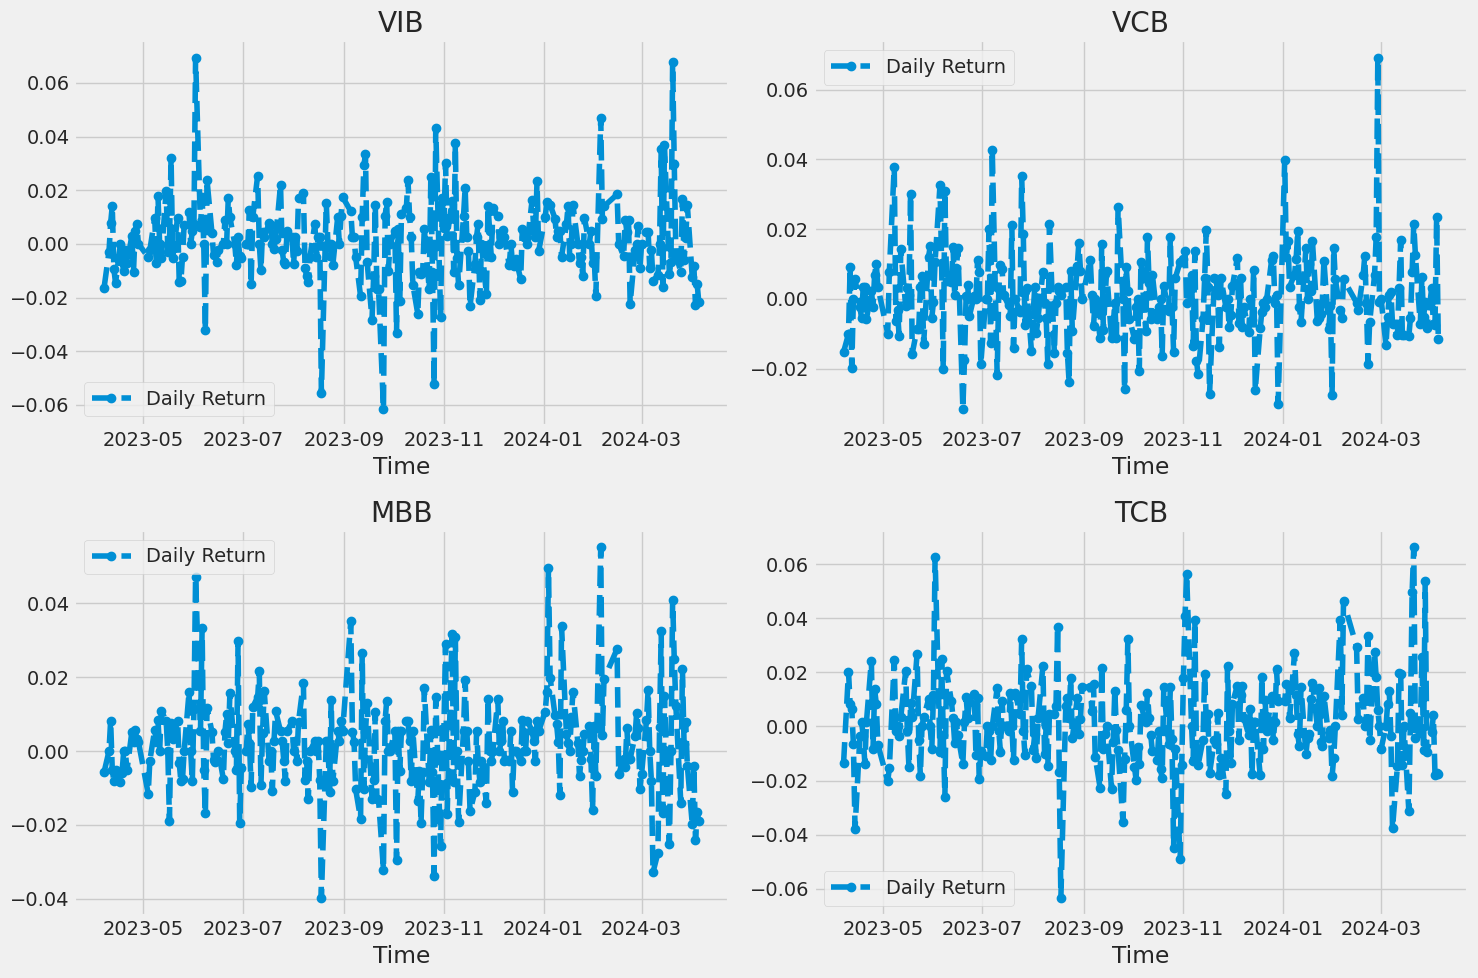

In [ ]:
# list_of_bank = ['VIB', 'VCB', 'MBB', 'TCB']
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

VIB['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('VIB')

VCB['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('VCB')

MBB['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MBB')

TCB['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('TCB')

fig.tight_layout()

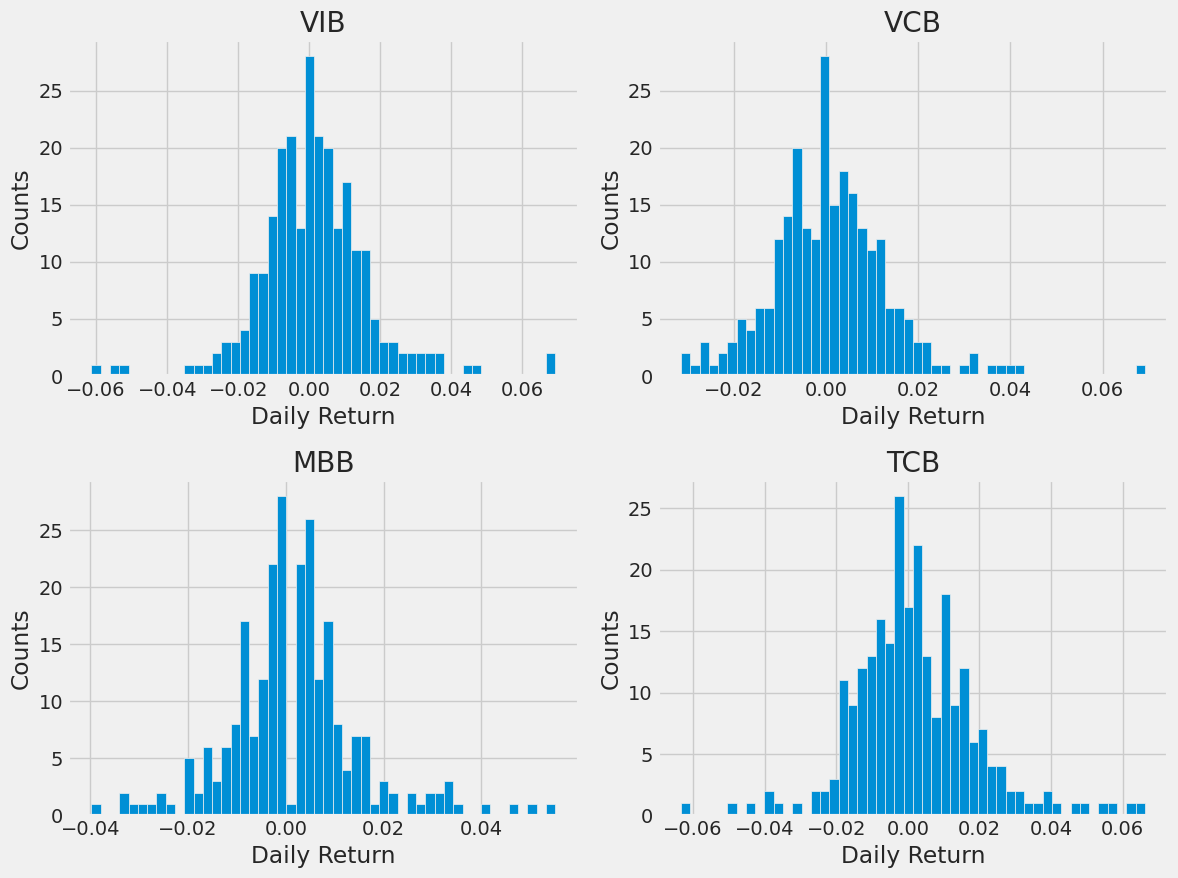

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
print(VIB["Close"])
print(VCB["Close"])

Time
2023-04-06    17.21
2023-04-07    16.93
2023-04-10    16.88
2023-04-11    17.01
2023-04-12    17.25
              ...  
2024-04-01    24.30
2024-04-02    24.10
2024-04-03    23.55
2024-04-04    23.20
2024-04-05    22.70
Name: Close, Length: 251, dtype: float64
Time
2023-04-06    77.39
2023-04-07    76.21
2023-04-10    75.44
2023-04-11    76.12
2023-04-12    74.60
              ...  
2024-04-01    95.20
2024-04-02    94.50
2024-04-03    93.80
2024-04-04    96.00
2024-04-05    94.90
Name: Close, Length: 251, dtype: float64


In [ ]:
# list_of_bank = ['VIB', 'VCB', 'MBB', 'TCB']

closing_df = pd.DataFrame()
closing_df.insert(0, 'VIB',VIB["Close"], True)
closing_df.insert(1, 'VCB',VCB["Close"], True)
closing_df.insert(2, 'MBB',MBB["Close"], True)
closing_df.insert(3, 'TCB',TCB["Close"], True)

tech_rets = closing_df.pct_change()
tech_rets.head()

,VIB,VCB,MBB,TCB
Time,,,,
2023-04-06,NaN,NaN,NaN,NaN
2023-04-07,-0.016270,-0.015247,-0.005675,-0.013356
2023-04-10,-0.002953,-0.010104,0.000000,0.020305
2023-04-11,0.007701,0.009014,0.008244,0.008292
2023-04-12,0.014109,-0.019968,-0.005031,0.006579


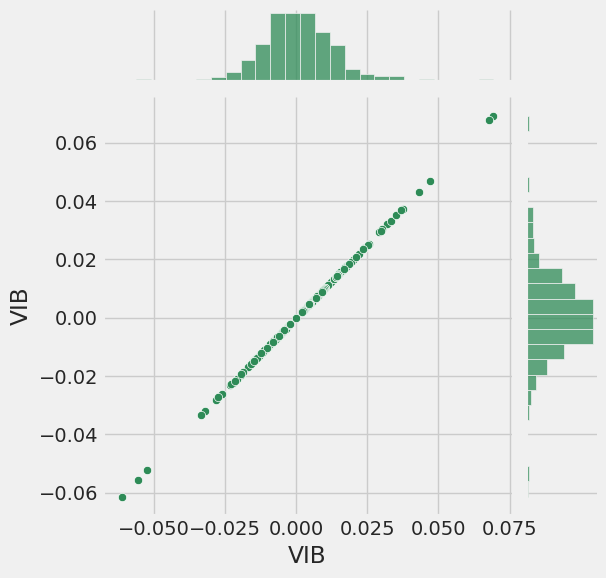

In [ ]:
# So sanh ma VIB voi chinh no
sns.jointplot(x='VIB', y='VIB', data=tech_rets, kind='scatter', color='seagreen')

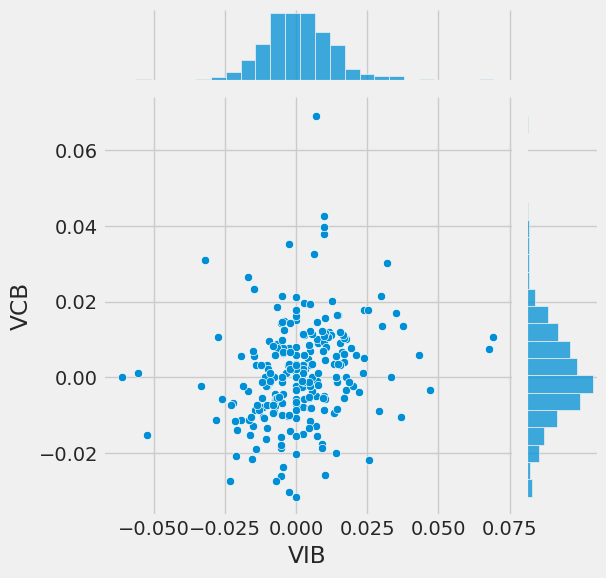

In [ ]:
# so sanh daily return giua VIB va VCB
# list_of_bank = ['VIB', 'VCB', 'MBB', 'TCB']

sns.jointplot(x='VIB', y='VCB', data=tech_rets, kind='scatter')

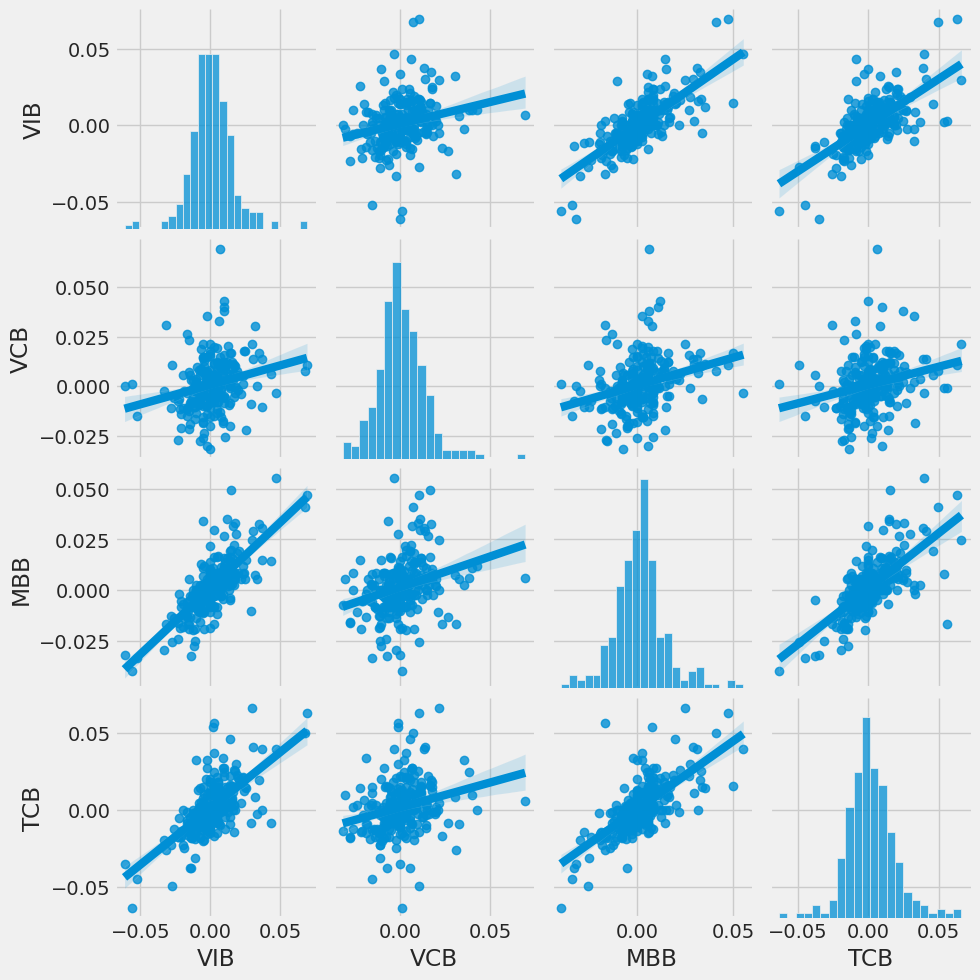

In [ ]:
sns.pairplot(tech_rets, kind='reg')

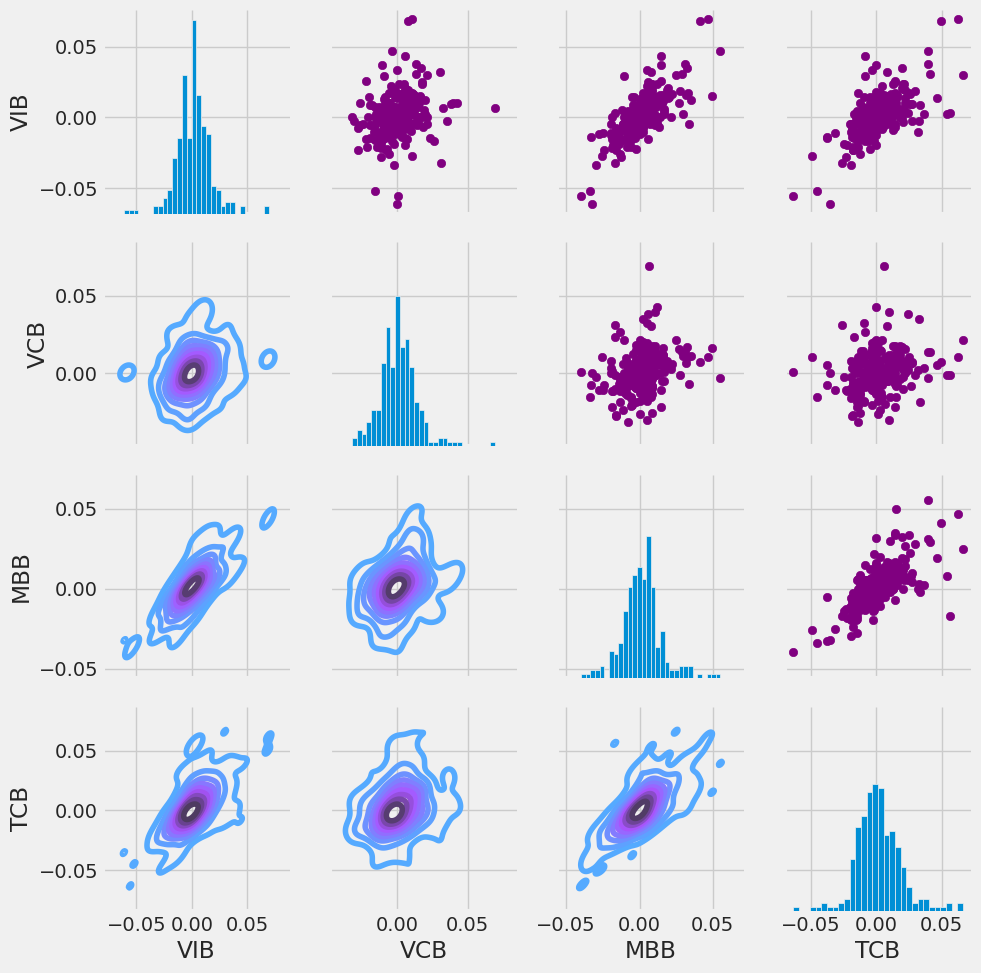

In [ ]:
return_fig = sns.PairGrid(tech_rets.dropna())

return_fig.map_upper(plt.scatter, color='purple')

return_fig.map_lower(sns.kdeplot, cmap='cool_d')

return_fig.map_diag(plt.hist, bins=30)

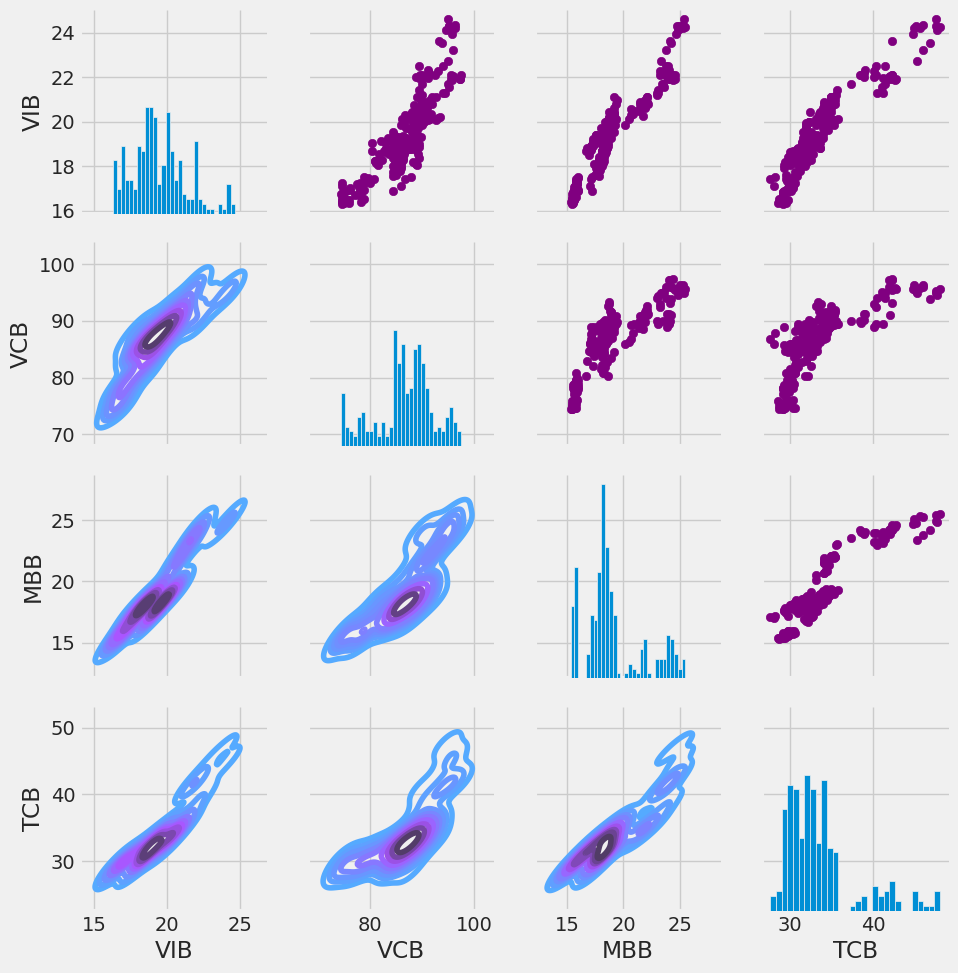

In [ ]:
returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)


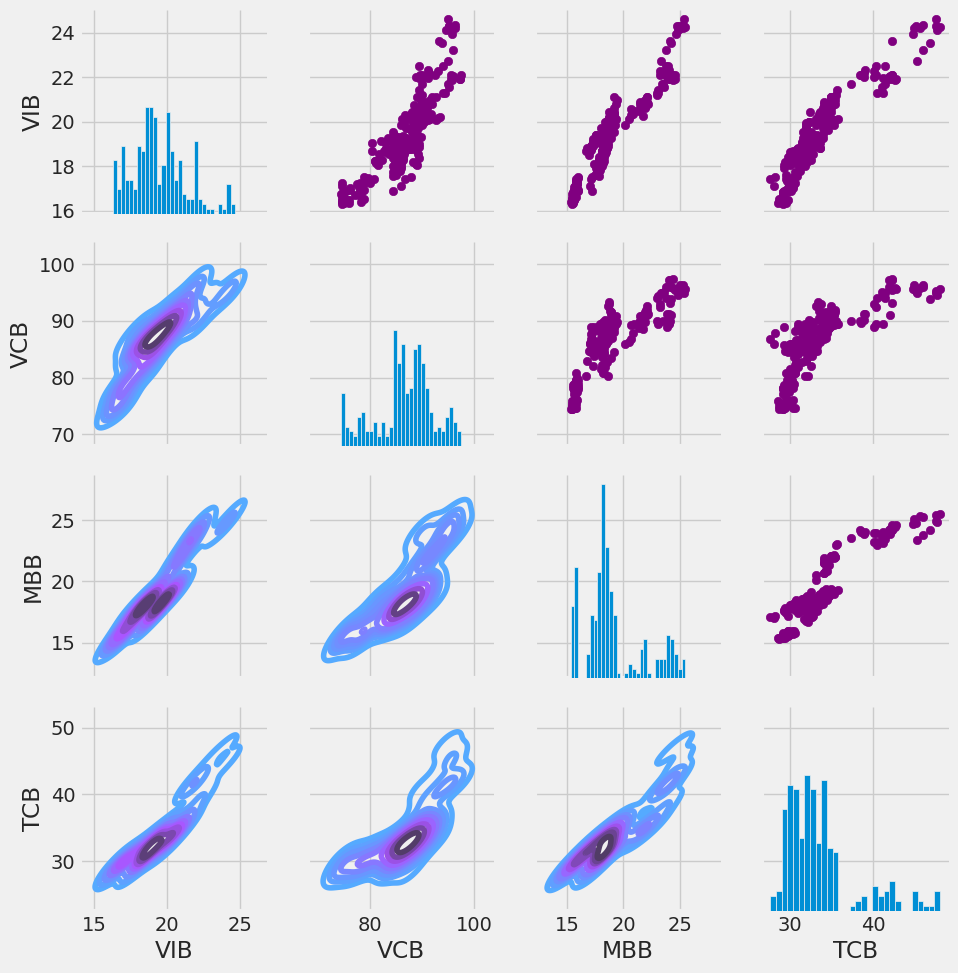

In [ ]:

returns_fig = sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)


Text(0.5, 1.0, 'Correlation of stock closing price')

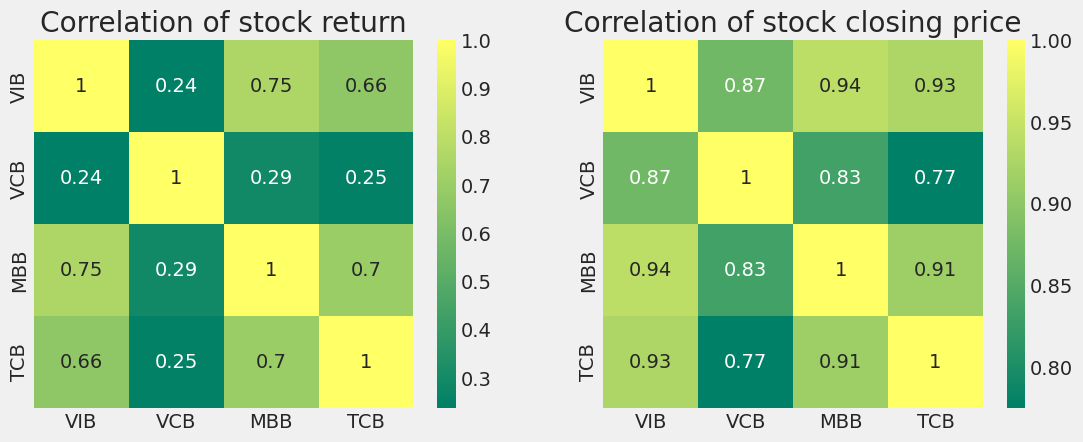

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

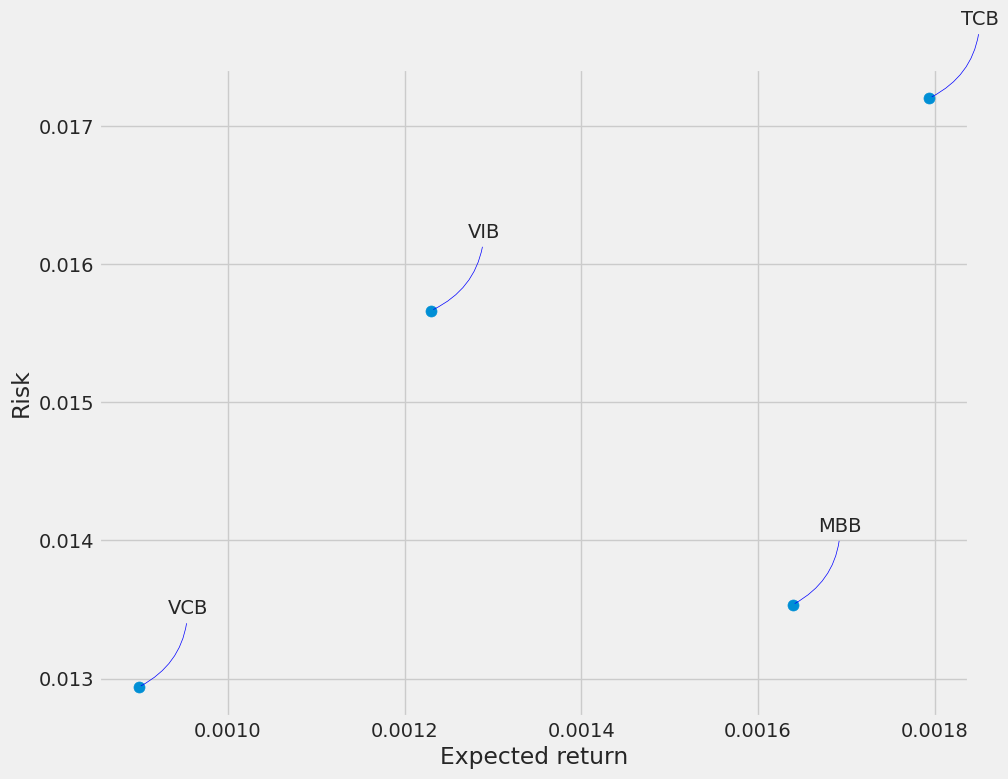

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the VIB stock quote
df = stock_historical_data(symbol = list_of_bank[0],
                            start_date = '2012-03-20',
                            end_date = end,
                            resolution='1D',
                            type='stock',
                            beautify=False,
                            decor=True,
                            source='DNSE')
df

,Open,High,Low,Close,Volume,Ticker
Time,,,,,,
2017-01-09,3.02,3.02,2.16,2.35,346000,VIB
2017-01-10,2.43,2.43,2.35,2.37,234947,VIB
2017-01-11,2.37,2.37,2.32,2.35,173442,VIB
2017-01-12,2.28,2.28,2.14,2.14,52349,VIB
2017-01-13,2.07,2.07,1.91,1.92,70740,VIB
...,...,...,...,...,...,...
2024-04-01,24.40,24.60,23.95,24.30,5853200,VIB
2024-04-02,24.05,24.30,23.55,24.10,11610200,VIB
2024-04-03,24.10,24.10,23.50,23.55,8770800,VIB


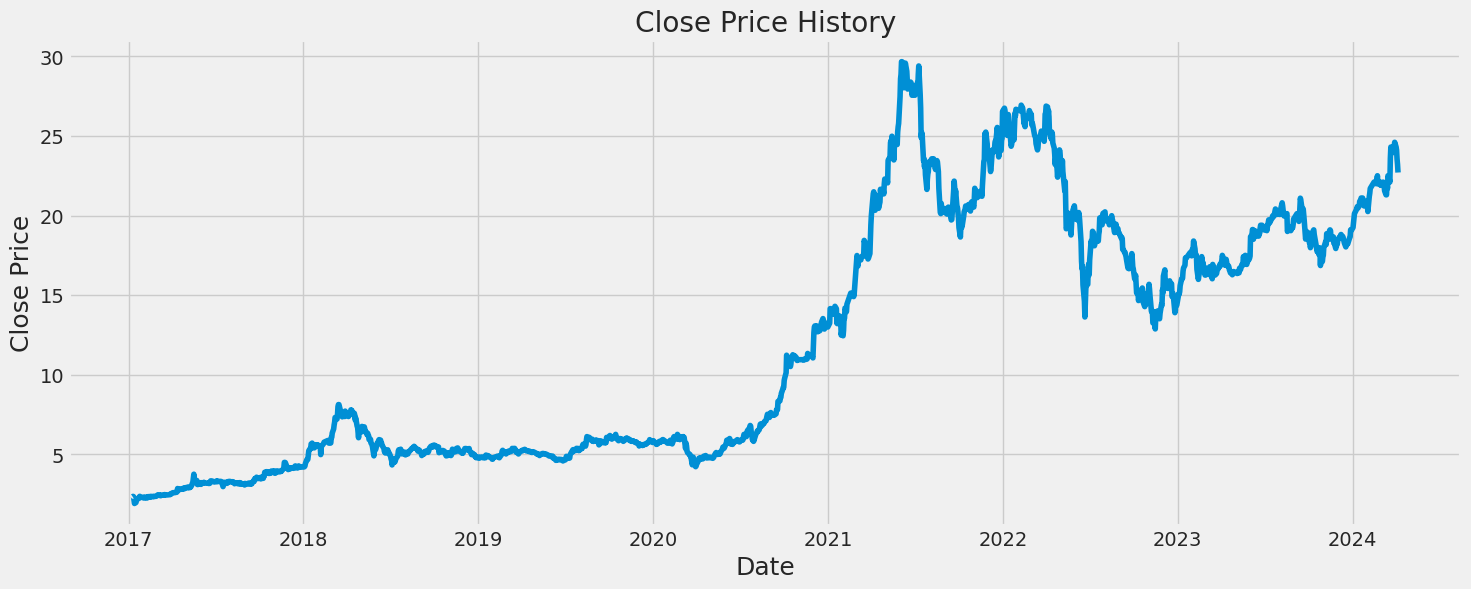

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# convert the dataframe to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1714

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01550108],
       [0.01622206],
       [0.01550108],
       ...,
       [0.77974045],
       [0.76712329],
       [0.74909877]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01550108, 0.01622206, 0.01550108, 0.00793079, 0.        ,
       0.00216294, 0.00612833, 0.00937275, 0.01153569, 0.01081471,
       0.01189618, 0.01622206, 0.01550108, 0.01225667, 0.0147801 ,
       0.01369863, 0.01369863, 0.01225667, 0.01297765, 0.01550108,
       0.01550108, 0.01405912, 0.0147801 , 0.01622206, 0.01550108,
       0.01550108, 0.01622206, 0.01550108, 0.01550108, 0.01622206,
       0.01622206, 0.01658255, 0.01766402, 0.01874549, 0.01982696,
       0.01874549, 0.01910598, 0.01766402, 0.01766402, 0.01874549,
       0.01874549, 0.01910598, 0.01874549, 0.01946647, 0.02018745,
       0.01910598, 0.01946647, 0.01946647, 0.01946647, 0.01946647,
       0.02018745, 0.02090844, 0.02018745, 0.02090844, 0.0223504 ,
       0.02451334, 0.02451334, 0.02451334, 0.02451334, 0.02523432])]
[0.02631578947368421]

[array([0.01550108, 0.01622206, 0.01550108, 0.00793079, 0.        ,
       0.00216294, 0.00612833, 0.00937275, 0.01153569, 0.01081471,
       0.01189618, 0.01622206, 0.01

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1654/1654 [==============================] - 18s 8ms/step - loss: 0.0021


In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 1s 6ms/step


0.6898206757616792

<ipython-input-33-c5c7edc25694>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


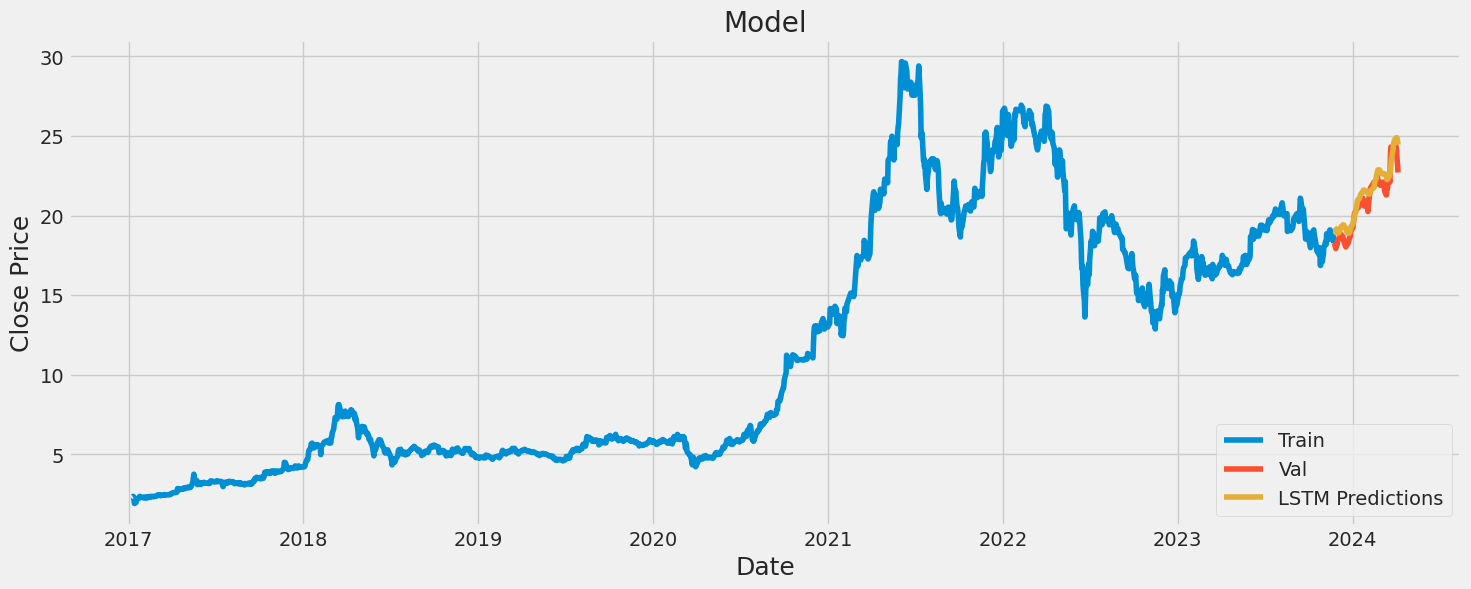

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'LSTM Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Time,,
2023-11-24,18.27,19.248678
2023-11-27,17.93,19.155794
2023-11-28,18.18,19.019434
2023-11-29,18.27,18.936731
2023-11-30,18.18,18.908583
...,...,...
2024-04-01,24.30,24.858952
2024-04-02,24.10,24.891516
2024-04-03,23.55,24.853992
